# Data Set: Corporate Energy CONSUMPTION – Open Calgary

## Introduction

Calgary has long been known as an energy city and is being recognized as a leader in the global energy transition. The weather in Calgary is slowly changing due to global warming. In 2021, for the first time in history, total electricity use hit a record high as a result of an increase in air conditioning use in the summer. Calgary typically peaks in energy use in winter, but that's likely to change now. When the temperature rises due to climate change, it is predicted that the use of energy for cooling will increase, which will result in more greenhouse gas emissions, which will lead to a vicious cycle of raising the temperature again. Currently, about 84% of greenhouse gases that cause climate change are generated in the process of using energy, so it is necessary to study where a lot of energy is generated in order to prevent climate warming. We aim to analyze and show energy use of facilities and infrastructure components on a monthly or yearly basis with an open dataset containing electricity, natural gas, solar power provided by the city.  

#### Calgary Tempurature fluctation for years

Temperature are given as a daily maximun, daily minimum and daily average. 
- Daily maximnum temperature is the hottest temperature in a day. 
- Daily minimun temperature is the coldest temperature in a day. 
- Daily avearage temperature is the average of the maxium temparature and minium temperature in a day

Before analyzing the energy consumption, let me explain the temperature change over the past 100 years.
The graph made through open data shows the average values of the hottest and coldest temperatures from 1948 to 2020 as shown below. Annual averages are also shown. The average annual temperature has risen by about 1.9 degrees. Based on the highest temperature per day in June, July, and August, the hottest months of the year, the difference in annual average values does not show much difference from 1948 to 2020. However, if you look at the difference in the average value every year based on the lowest temperature in one day, the temperature has risen since 2000. Also, looking at the graph comparing the lowest and highest average monthly temperatures for 2000, 2010, and 2020, the temperature in November and December in 2020 is about -4 degrees higher than in 2000 and 2010. In the case of July and August, the hot period is distributed for a long time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import griddata
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from geopandas import GeoDataFrame
sns.set()

fields = ['date', 'max_temperature','min_temperature', 'avg_hourly_temperature', 'avg_temperature']
weatherdata = pd.read_csv("../dataset/weatherstats_calgary_daily.csv", skipinitialspace=True, usecols=fields)
display(weatherdata)

date  max_temperature  avg_hourly_temperature  avg_temperature  \
0      2021-10-10             13.9                    5.80             7.40   
1      2021-10-09             17.6                    8.51             7.75   
2      2021-10-08             12.5                    5.25             4.84   
3      2021-10-07             13.0                    6.14             5.45   
4      2021-10-06             13.2                    5.93             7.69   
...           ...              ...                     ...              ...   
51140  1881-10-04              NaN                     NaN              NaN   
51141  1881-10-03              NaN                     NaN              NaN   
51142  1881-10-02              NaN                     NaN              NaN   
51143  1881-10-01              NaN                     NaN              NaN   
51144  1881-09-30              NaN                     NaN              NaN   

       min_temperature  
0                  0.9  
1                 -2.1  
2                 -2.8  
3                 -2.1  
4                  2.2  
...                ...  
51140              NaN  
51141              NaN  
51142              NaN  
51143              NaN  
51144              NaN  

[51145 rows x 5 columns]

#### Average annual temperature in Calgary from 1920 to 2021 ####
          mean
Year          
1948  3.002022
1949  3.305260
1950  1.305781
1951  1.228110
1952  3.873033
...        ...
2016  6.176284
2017  5.149068
2018  4.332438
2019  3.834822
2020  4.982568

[73 rows x 1 columns]
#### Average hottest temperature each day of June, July, and August from 1920 to 2021 ####
           mean
Year           
1948  22.357609
1949  22.807609
1950  21.171739
1951  18.640217
1952  20.080435
...         ...
2016  22.372826
2017  24.752174
2018  23.576087
2019  21.557609
2020  22.638043

[73 rows x 1 columns]
#### Average coldest temperature each day of Jan, Feb, and Mar from 1920 to 2021 ####
           mean
Year           
1948 -15.403297
1949 -20.331111
1950 -18.666667
1951 -17.180000
1952 -14.182418
...         ...
2016 -10.210989
2017 -11.730000
2018 -12.768889
2019 -13.744444
2020 -10.273626

[73 rows x 1 columns]


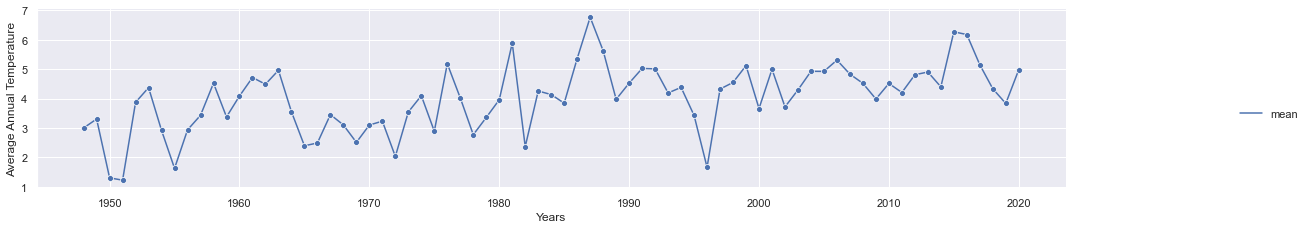

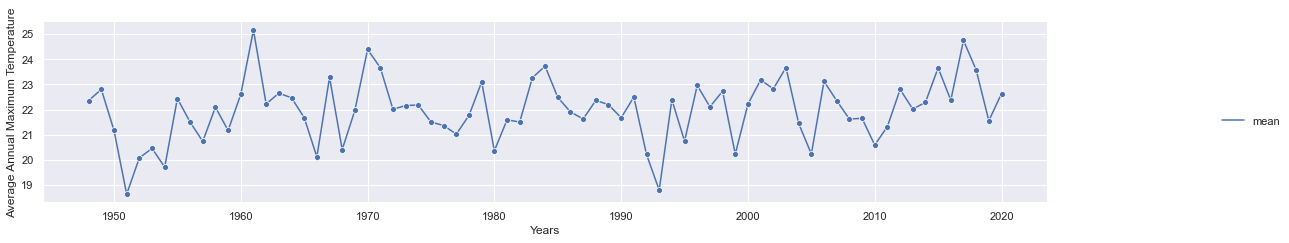

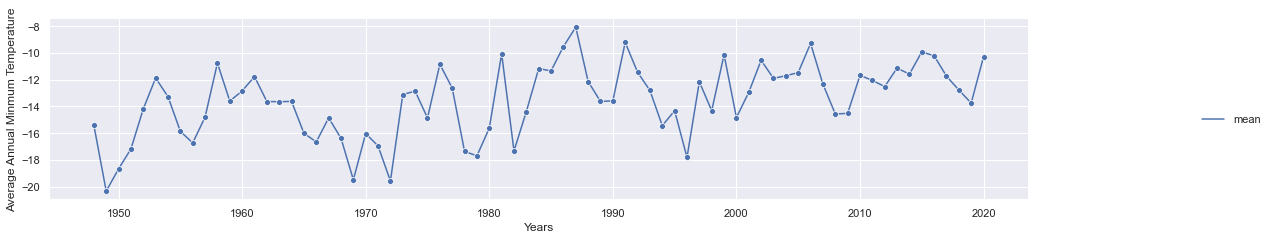

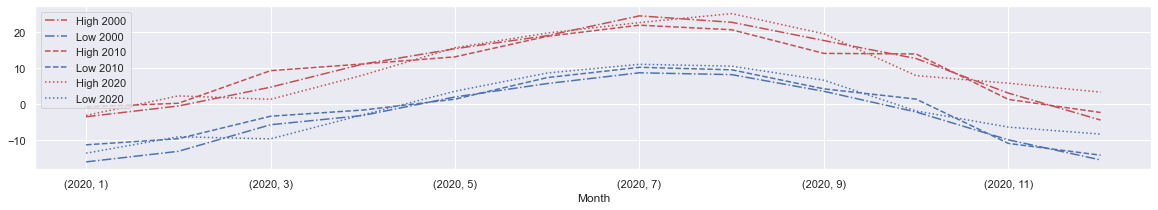

In [2]:
#tempData.head()
weatherdata.date=pd.to_datetime(weatherdata.date)

yseries = weatherdata['date'].dt.year
mseries = weatherdata['date'].dt.month
dseries = weatherdata['date'].dt.day

tempData = pd.DataFrame({'Date':weatherdata['date']
                         ,'Year': yseries
                         ,'Month': mseries 
                         ,'max_temperature':weatherdata['max_temperature']
                         ,'min_temperature':weatherdata['min_temperature']
                         ,'avg_hourly_temperature':weatherdata['avg_hourly_temperature']
                         ,'avg_temperature':weatherdata['avg_temperature']})

meanData=tempData[(tempData['Year'] >= 1948) & (tempData['Year'] <= 2020) ].groupby(['Year']).agg(mean = ('avg_temperature','mean'))
g=sns.relplot(kind='line', data=meanData, linestyle='-', marker='o', label="dd")
g.fig.set_size_inches(20,3)
g.set(xlabel='Years', ylabel='Average Annual Temperature')
print('#### Average annual temperature in Calgary from 1920 to 2021 ####')
print(meanData)

# calculate mean from November to March for each year
summerData=tempData[(tempData['Year'] >= 1948) & (tempData['Year'] <= 2020) & (tempData['Month'] <= 8) & (tempData['Month'] >= 6)]
summerMeanData=summerData.groupby(['Year']).agg(mean = ('max_temperature','mean'))
#summerMeanData.plot(kind='line',figsize=(20,3), marker='o')
g=sns.relplot(kind='line', data=summerMeanData, linestyle='-', marker='o', label="dd")
g.fig.set_size_inches(20,3)
g.set(xlabel='Years', ylabel='Average Annual Maximum Temperature')
print('#### Average hottest temperature each day of June, July, and August from 1920 to 2021 ####')
print(summerMeanData)

# calculate mean from December to Feb for each year
winterData=tempData[(tempData['Year'] >= 1948) & (tempData['Year'] <= 2020) & (tempData['Month'].isin([12,1,2]))]
winterMeanData=winterData.groupby(['Year']).agg(mean = ('min_temperature','mean'))
#winterMeanData.plot(kind='line',figsize=(20,3), marker='o').invert_yaxis()
g=sns.relplot(kind='line', data=winterMeanData, linestyle='-', marker='o', label="dd")
g.fig.set_size_inches(20,3)
g.set(xlabel='Years', ylabel='Average Annual Minmum Temperature')
print('#### Average coldest temperature each day of Jan, Feb, and Mar from 1920 to 2021 ####')
print(winterMeanData)

data1=tempData[(tempData['Year']==2000)]
#data1_mean=data1.groupby(['Year','Month']).agg(mean = ('avg_temperature','mean'))
data1_max_mean=data1.groupby(['Year','Month']).agg(mean = ('max_temperature','mean'))
data1_min_mean=data1.groupby(['Year','Month']).agg(mean = ('min_temperature','mean'))

data2=tempData[(tempData['Year']==2010)]
#data2_mean=data2.groupby(['Year','Month']).agg(mean = ('avg_temperature','mean'))
data2_max_mean=data2.groupby(['Year','Month']).agg(mean = ('max_temperature','mean'))
data2_min_mean=data2.groupby(['Year','Month']).agg(mean = ('min_temperature','mean'))

data3=tempData[(tempData['Year']==2020)]
#data3_mean=data3.groupby(['Year','Month']).agg(mean = ('avg_temperature','mean'))
data3_max_mean=data3.groupby(['Year','Month']).agg(mean = ('max_temperature','mean'))
data3_min_mean=data3.groupby(['Year','Month']).agg(mean = ('min_temperature','mean'))


fig, ax = plt.subplots()
months=['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
#data1_mean.plot(kind='line',figsize=(20,3),ax=ax, c='r', linestyle=':')
data1_max_mean.plot(kind='line',figsize=(20,3),ax=ax, c='r', linestyle='-.',label='2001')
data1_min_mean.plot(kind='line',figsize=(20,3),ax=ax, c='b', linestyle='-.')


#data2_mean.plot(kind='line',figsize=(20,3),ax=ax, c='r', linestyle=':')
data2_max_mean.plot(kind='line',figsize=(20,3),ax=ax, c='r', linestyle='--')
data2_min_mean.plot(kind='line',figsize=(20,3),ax=ax, c='b', linestyle='--')


#data3_mean.plot(kind='line',figsize=(20,3),ax=ax, c='r', linestyle=':')
data3_max_mean.plot(kind='line',figsize=(20,3),ax=ax, c='r', linestyle=':')
data3_min_mean.plot(kind='line',figsize=(20,3),ax=ax, c='b', linestyle=':')
ax.set_xlabel("Month")
plt.legend(["High 2000","Low 2000","High 2010","Low 2010","High 2020","Low 2020"])
plt.show()

## Guiding Questions

### 1. What is the recent trend of year-on-year energy consumption in the city?

Here the energy consumption data is calculated based on,
- Natural Gas
- Solar Power Energy
- Solar Thermal Energy

Also the units were first converted from kwh to GJ in order to observe statistics on the same unit of energy consumption. Afet data wrangling we found maximum consumption of out of the above said three sources and found the Natural Gas being as the highest source of fuel to produce electricity.

In [2]:

energydata = pd.read_csv("../dataset/Corporate_Energy_Consumption.csv", thousands=',')

def func(x):
    if(x['Unit'] == 'kWh'):
        x['Total Consumption'] = pd.to_numeric(x['Total Consumption'])*0.0036
        x['Unit'] = 'GJ'
        return x
    else:
        return x


energydata = energydata.apply(lambda x: func(x), axis=1)
# display(energydata)

energyResourcesData = energydata[(energydata['Energy Description'] != 'Electricity') & (energydata['Energy Description'] != 'District Energy')& (energydata['Total Consumption'] != 0.0)]

newData = energydata.groupby(['Energy Description', 'Year']).sum()


disEnergyData = newData.loc['District Energy']
electricityData = newData.loc['Electricity']
ngData = newData.loc['Natural Gas']
seData = newData.loc['Solar Power']
stData = newData.loc['Solar Thermal']


naturalGasConsumption = energyResourcesData[energyResourcesData['Energy Description']=='Natural Gas']
print("Maximum consumption of Natual gas to date in a year: ", naturalGasConsumption['Total Consumption'].max())
solarEnergyConsumption = energyResourcesData[energyResourcesData['Energy Description']=='Solar Power']
print("Maximum consumption of Solar power to date in a year: ", solarEnergyConsumption['Total Consumption'].max())
solarThermalConsumption = energyResourcesData[energyResourcesData['Energy Description']=='Solar Thermal']
print("Maximum consumption of Solar thermal power to date in a year: ", solarThermalConsumption['Total Consumption'].max())


Maximum consumption of Natual gas to date in a year:  44131.0
Maximum consumption of Solar power to date in a year:  2882.592
Maximum consumption of Solar thermal power to date in a year:  248.0


In [17]:
print("Maximum consumption of Natual gas is done in year: \n", naturalGasConsumption['Year'][naturalGasConsumption['Total Consumption']==44131.0])
print(solarEnergyConsumption['Year'][solarEnergyConsumption['Total Consumption']==2882.592])
print(solarThermalConsumption['Year'][solarThermalConsumption['Total Consumption']==248.0])

Maximum consumption of Natual gas is done in year: 
 131250    2021
Name: Year, dtype: int64
123096    2020
Name: Year, dtype: int64
105983    2014
Name: Year, dtype: int64


In [17]:
display(naturalGasConsumption)

Business Unit Desc                              FacilityName  \
456     Calgary Growth Strategies                 INACTIVE - EASTLAKE DEPOT   
457     Calgary Growth Strategies                 INACTIVE - EASTLAKE DEPOT   
458     Calgary Growth Strategies                 INACTIVE - EASTLAKE DEPOT   
459     Calgary Growth Strategies                 INACTIVE - EASTLAKE DEPOT   
460     Calgary Growth Strategies                 INACTIVE - EASTLAKE DEPOT   
...                           ...                                       ...   
161302             Water Services  VALLEYFIELD WASTEWATER RECEIVING STATION   
161303             Water Services  VALLEYFIELD WASTEWATER RECEIVING STATION   
161304             Water Services  VALLEYFIELD WASTEWATER RECEIVING STATION   
161305             Water Services  VALLEYFIELD WASTEWATER RECEIVING STATION   
161307             Water Services  VALLEYFIELD WASTEWATER RECEIVING STATION   

              Site ID FacilityAddress Energy Description  Year Month  \
456     0003045011383  11195 42 ST SE        Natural Gas  2014   Jan   
457     0003045011383  11195 42 ST SE        Natural Gas  2014   Feb   
458     0003045011383  11195 42 ST SE        Natural Gas  2014   Mar   
459     0003045011383  11195 42 ST SE        Natural Gas  2014   Apr   
460     0003045011383  11195 42 ST SE        Natural Gas  2014   May   
...               ...             ...                ...   ...   ...   
161302  0003025408748   2315 49 AV SE        Natural Gas  2021   Feb   
161303  0003025408748   2315 49 AV SE        Natural Gas  2021   Mar   
161304  0003025408748   2315 49 AV SE        Natural Gas  2021   Apr   
161305  0003025408748   2315 49 AV SE        Natural Gas  2021   May   
161307  0003025408748   2315 49 AV SE        Natural Gas  2021   Jul   

        Total Consumption Unit  
456                 224.0   GJ  
457                 245.0   GJ  
458                 209.0   GJ  
459                 100.0   GJ  
460                  64.0   GJ  
...                   ...  ...  
161302               54.0   GJ  
161303               36.0   GJ  
161304               25.0   GJ  
161305               18.0   GJ  
161307                1.0   GJ  

[33473 rows x 9 columns]

In [18]:
display(solarEnergyConsumption)

Business Unit Desc                         FacilityName  \
39515     Calgary Transit      CTRAIN STATION - 69TH STREET SW   
39516     Calgary Transit      CTRAIN STATION - 69TH STREET SW   
39517     Calgary Transit      CTRAIN STATION - 69TH STREET SW   
39518     Calgary Transit      CTRAIN STATION - 69TH STREET SW   
39519     Calgary Transit      CTRAIN STATION - 69TH STREET SW   
...                   ...                                  ...   
133602     Water Services  GLENMORE WATER TREATMENT PLANT - WB   
133603     Water Services  GLENMORE WATER TREATMENT PLANT - WB   
133604     Water Services  GLENMORE WATER TREATMENT PLANT - WB   
133605     Water Services  GLENMORE WATER TREATMENT PLANT - WB   
133606     Water Services  GLENMORE WATER TREATMENT PLANT - WB   

                                Site ID FacilityAddress Energy Description  \
39515   CTRAIN STATION - 69 ST SW SOLAR  6999C 17 AV SW        Solar Power   
39516   CTRAIN STATION - 69 ST SW SOLAR  6999C 17 AV SW        Solar Power   
39517   CTRAIN STATION - 69 ST SW SOLAR  6999C 17 AV SW        Solar Power   
39518   CTRAIN STATION - 69 ST SW SOLAR  6999C 17 AV SW        Solar Power   
39519   CTRAIN STATION - 69 ST SW SOLAR  6999C 17 AV SW        Solar Power   
...                                 ...             ...                ...   
133602   GLENMORE WTP - SOLAR - EXPORTS   1646 56 AV SW        Solar Power   
133603             GLENMORE WTP - SOLAR   1646 56 AV SW        Solar Power   
133604   GLENMORE WTP - SOLAR - EXPORTS   1646 56 AV SW        Solar Power   
133605             GLENMORE WTP - SOLAR   1646 56 AV SW        Solar Power   
133606             GLENMORE WTP - SOLAR   1646 56 AV SW        Solar Power   

        Year Month  Total Consumption Unit  
39515   2018   Jun             3.0384   GJ  
39516   2018   Jul            17.1288   GJ  
39517   2018   Aug            13.8276   GJ  
39518   2018   Sep             8.9280   GJ  
39519   2018   Oct            12.9420   GJ  
...      ...   ...                ...  ...  
133602  2021   Mar            -1.0152   GJ  
133603  2021   Apr           125.7444   GJ  
133604  2021   Apr            -0.4176   GJ  
133605  2021   May           120.1608   GJ  
133606  2021   Jun           138.7872   GJ  

[1091 rows x 9 columns]

In [19]:
display(solarThermalConsumption)

Business Unit Desc              FacilityName  \
105977  Facility Management  SOUTHLAND LEISURE CENTRE   
105978  Facility Management  SOUTHLAND LEISURE CENTRE   
105979  Facility Management  SOUTHLAND LEISURE CENTRE   
105980  Facility Management  SOUTHLAND LEISURE CENTRE   
105981  Facility Management  SOUTHLAND LEISURE CENTRE   
...                     ...                       ...   
106040  Facility Management  SOUTHLAND LEISURE CENTRE   
106041  Facility Management  SOUTHLAND LEISURE CENTRE   
106042  Facility Management  SOUTHLAND LEISURE CENTRE   
106043  Facility Management  SOUTHLAND LEISURE CENTRE   
106044  Facility Management  SOUTHLAND LEISURE CENTRE   

                           Site ID       FacilityAddress Energy Description  \
105977  SLC - SOLAR THERMAL SYSTEM  2000 SOUTHLAND DR SW      Solar Thermal   
105978  SLC - SOLAR THERMAL SYSTEM  2000 SOUTHLAND DR SW      Solar Thermal   
105979  SLC - SOLAR THERMAL SYSTEM  2000 SOUTHLAND DR SW      Solar Thermal   
105980  SLC - SOLAR THERMAL SYSTEM  2000 SOUTHLAND DR SW      Solar Thermal   
105981  SLC - SOLAR THERMAL SYSTEM  2000 SOUTHLAND DR SW      Solar Thermal   
...                            ...                   ...                ...   
106040  SLC - SOLAR THERMAL SYSTEM  2000 SOUTHLAND DR SW      Solar Thermal   
106041  SLC - SOLAR THERMAL SYSTEM  2000 SOUTHLAND DR SW      Solar Thermal   
106042  SLC - SOLAR THERMAL SYSTEM  2000 SOUTHLAND DR SW      Solar Thermal   
106043  SLC - SOLAR THERMAL SYSTEM  2000 SOUTHLAND DR SW      Solar Thermal   
106044  SLC - SOLAR THERMAL SYSTEM  2000 SOUTHLAND DR SW      Solar Thermal   

        Year Month  Total Consumption Unit  
105977  2014   Jan              111.0   GJ  
105978  2014   Feb              146.0   GJ  
105979  2014   Mar              187.0   GJ  
105980  2014   Apr              229.0   GJ  
105981  2014   May              224.0   GJ  
...      ...   ...                ...  ...  
106040  2019   Apr               84.0   GJ  
106041  2019   May               80.0   GJ  
106042  2019   Jun               17.0   GJ  
106043  2019   Jul                1.0   GJ  
106044  2019   Aug                2.0   GJ  

[68 rows x 9 columns]

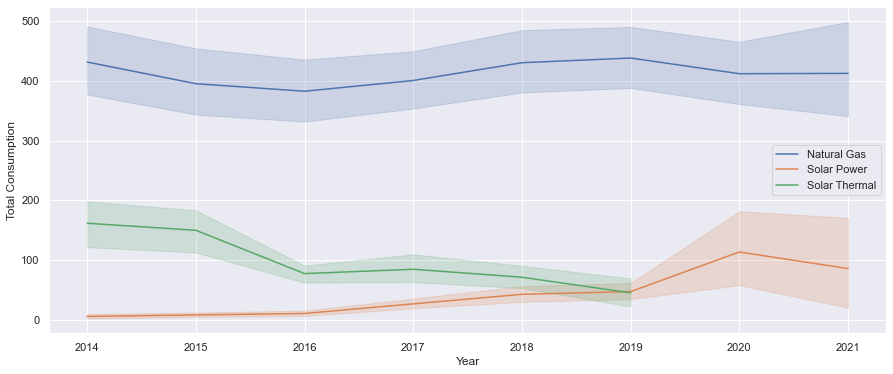

In [31]:
fig = plt.figure()
fig.set_size_inches(15,6)

ngDataPlot = sns.lineplot(data=naturalGasConsumption, x="Year", y="Total Consumption")
seDataPlot = sns.lineplot(data=solarEnergyConsumption, x="Year", y="Total Consumption")
stDataPlot = sns.lineplot(data=solarThermalConsumption, x="Year", y="Total Consumption")

legend = plt.legend(labels=["Natural Gas","Solar Power", "Solar Thermal"], loc='center right')

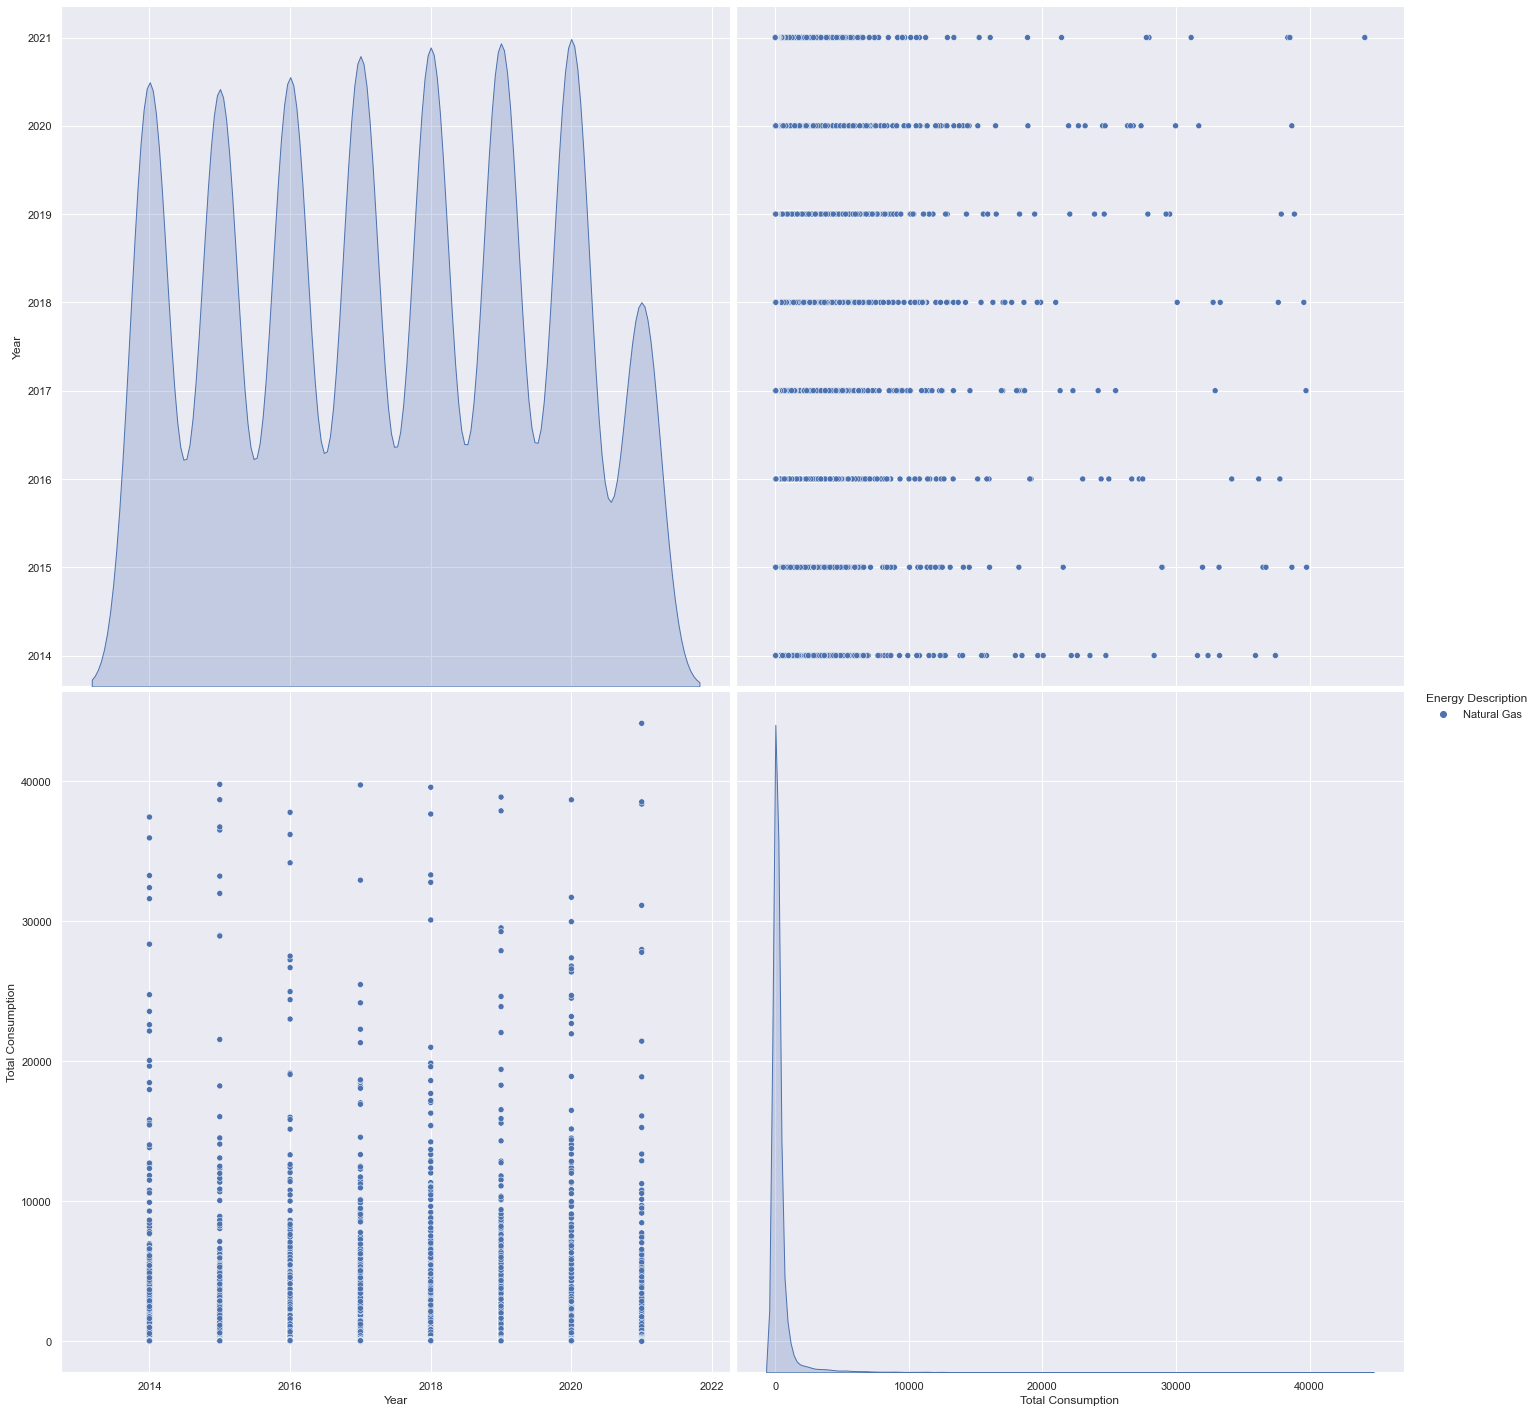

In [38]:
plots = sns.pairplot(naturalGasConsumption, hue='Energy Description', height=10);

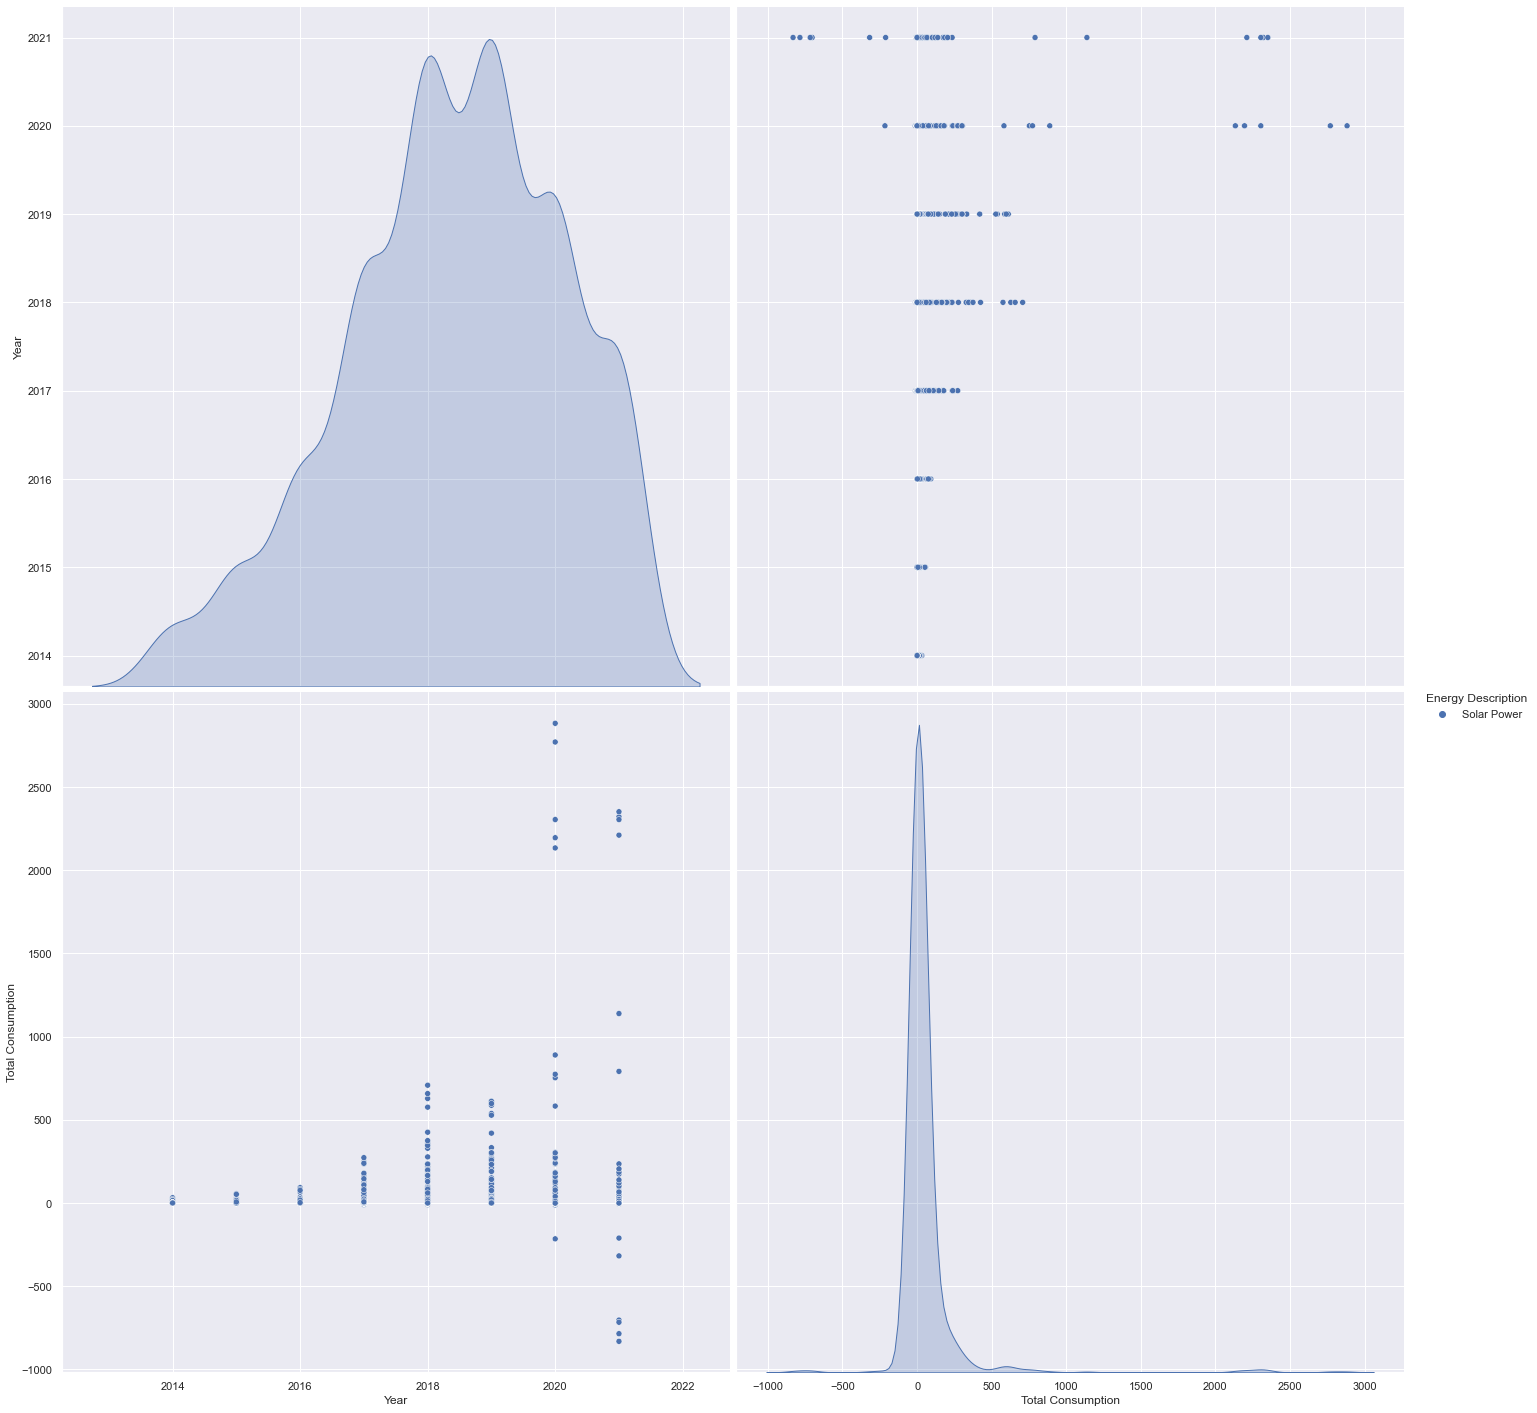

In [35]:
plots = sns.pairplot(solarEnergyConsumption, hue='Energy Description', height=10);

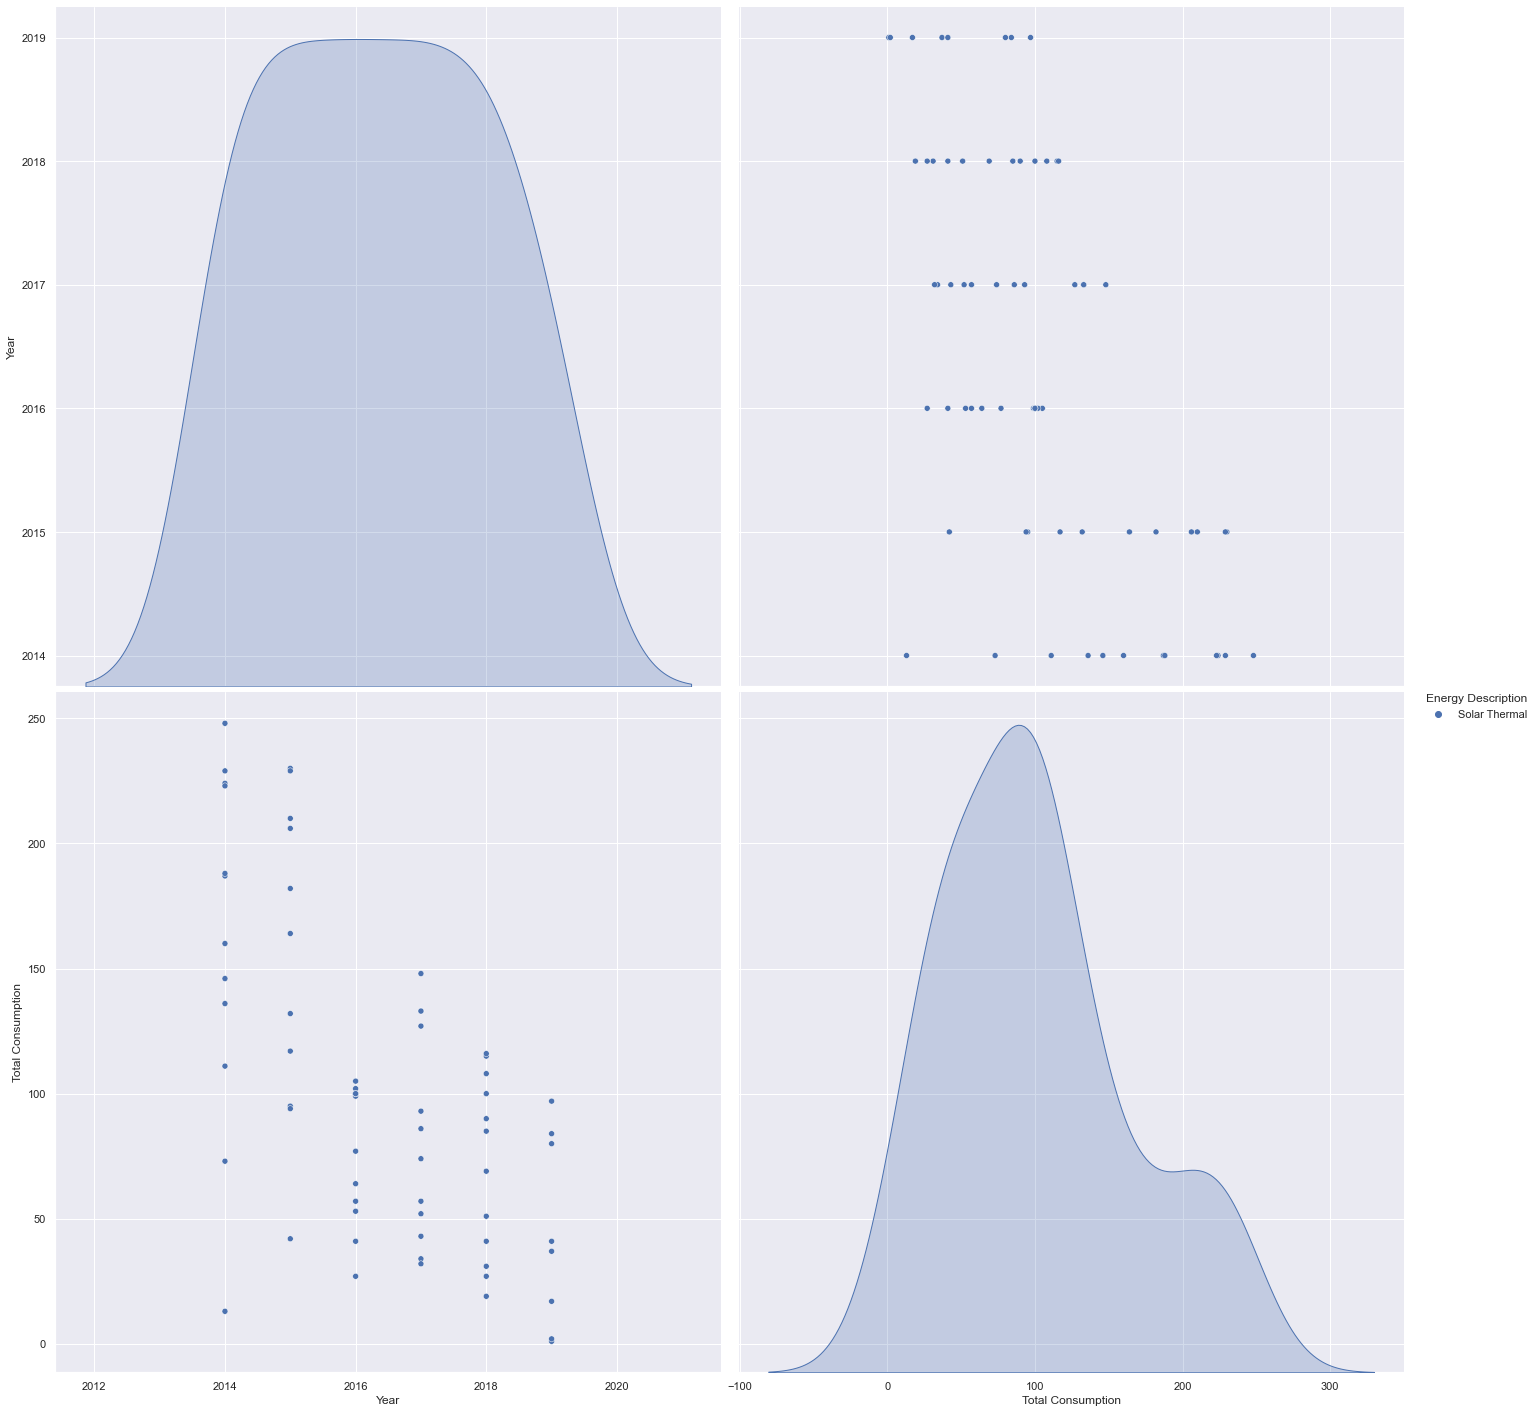

In [6]:
plots = sns.pairplot(solarThermalConsumption, hue='Energy Description', height=10);

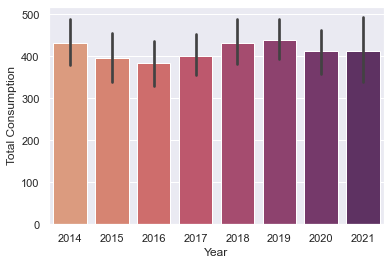

In [24]:
plot = sns.barplot(data=naturalGasConsumption, x="Year", y="Total Consumption", palette="flare")

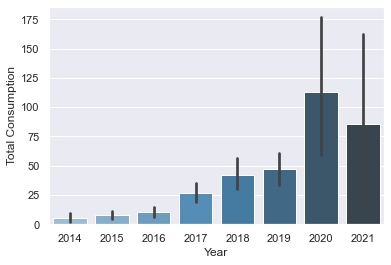

In [8]:
plot = sns.barplot(data=solarEnergyConsumption, x="Year", y="Total Consumption", palette="Blues_d")

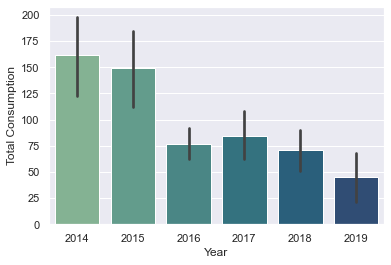

In [9]:
plot = sns.barplot(data=solarThermalConsumption, x="Year", y="Total Consumption", palette="crest")

In [10]:
df = solarEnergyConsumption.to_json()
fig = px.choropleth_mapbox(solarEnergyConsumption, geojson=df,
                           locations="Site ID", featureidkey="Total Consumption", 
                           #color='other_res',
                           center={"lat": 51.0486, "lon": -114.0708},  #Calgary
                           opacity=0.5,
                           mapbox_style="carto-positron", zoom=9)

fig.update_layout(margin={"r":1,"t":0,"l":0,"b":1})
fig.show()

### What’s the distribution of the energy production i.e., how much energy is being produced from renewable resources like solar and non-renewable resources like natural gas?

#### Please explain ....

In [10]:

non_renewable_energy= energydata[(energydata['Energy Description'] == 'Electricity') | (energydata['Energy Description'] == 'Natural Gas')].groupby(['Year']).sum()
renewable_energy= energydata[(energydata['Energy Description'] == 'Solar Power') | (energydata['Energy Description'] == 'Solar Thermal')].groupby(['Year']).sum()

print("===== Non Renewable Energy (Electricity & Natural Gas) ========")
display(non_renewable_energy)
print("===== Renewable Energy (Solar Power & Solar Thermal)  ========")
display(renewable_energy)

years=['2014','2015','2016','2017','2018','2019','2020','2021']
fig = px.bar(non_renewable_energy, x=years, y='Total Consumption')
fig.update_layout(
    title="Energy produced from non renewable resources",
    xaxis_title="Years",
    yaxis_title="Total Non Renewable Consumption",
    font=dict(
        size=15,
        color="#7f7f7f"
    )
)
fig.show()

fig = px.bar(renewable_energy, x=years, y='Total Consumption')
fig.update_layout(
    title="Energy produced from renewable resources",
    xaxis_title="Years",
    yaxis_title="Total Renewable Consumption",
    font=dict(
        size=15,
        color="#7f7f7f"
    )
)
fig.show()



===== Non Renewable Energy (Electricity & Natural Gas) ========


Total Consumption
Year                   
2014       3.583436e+06
2015       3.364074e+06
2016       3.294217e+06
2017       3.416959e+06
2018       3.618689e+06
2019       3.629713e+06
2020       3.407248e+06
2021       1.987246e+06

===== Renewable Energy (Solar Power & Solar Thermal)  ========


Total Consumption
Year                   
2014          2059.1508
2015          2137.5248
2016          1743.1540
2017          5094.7528
2018         10884.8364
2019         11766.6296
2020         20505.6720
2021         10937.8764

### In the end we willsum up different corporates and facilities energy consumption trends over the year and what’s their main source of resource of energy?

#### Please explain ....

In [11]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import plotly.express as px
import plotly.graph_objects as go
rdata = pd.read_csv("../dataset/Corporate_Energy_Consumption.csv")

for col in rdata.columns:
    print(col + ": " + str(rdata[col].dtype))

Business Unit Desc: object
FacilityName: object
Site ID: object
FacilityAddress: object
Energy Description: object
Year: int64
Month: object
Total Consumption: object
Unit: object


FacilityName  02F201 - INLAND ATHLETIC PARK  10B787 - ELLISTON PARK  \
Year                                                                  
2014                                  884.0                  7208.0   
2015                                 1529.0                  7575.0   
2016                                    NaN                  7221.0   
2017                                    NaN                  7156.0   
2018                                 1933.0                  8206.0   
2019                                  981.0                  8335.0   
2020                                  912.0                  8309.0   
2021                                    NaN                  4797.0   

FacilityName  17 AV & 1 ST SW PEDESTRIAN LIGHTING  \
Year                                                
2014                                          NaN   
2015                                          NaN   
2016                                          NaN   
2017                                          NaN   
2018                                          NaN   
2019                                          NaN   
2020                                        642.0   
2021                                        482.0   

FacilityName  17 AV & 8 ST SW PEDESTRIAN LIGHTING  \
Year                                                
2014                                          NaN   
2015                                          NaN   
2016                                          NaN   
2017                                          NaN   
2018                                          NaN   
2019                                          NaN   
2020                                        741.0   
2021                                        462.0   

FacilityName  17 AV & MACLEOD TR SE PEDESTRIAN LIGHTING  19 ST DEPOT  \
Year                                                                   
2014                                                NaN       6148.0   
2015                                                NaN       5389.0   
2016                                                NaN       5514.0   
2017                                                NaN       6921.0   
2018                                                NaN       2969.0   
2019                                                NaN       4929.0   
2020                                                NaN       6458.0   
2021                                              890.0       3365.0   

FacilityName  200 6704 6 ST SW HOUSING  210 15 AV NE HOUSING  \
Year                                                           
2014                               NaN                   NaN   
2015                               NaN                   NaN   
2016                           27207.0               15205.0   
2017                           45881.0               28694.0   
2018                           19255.0                   NaN   
2019                               NaN                   NaN   
2020                               NaN                   NaN   
2021                               NaN                   NaN   

FacilityName  3 ST BARCLAY MALL  4 CORNERS OFFICE BUILDING  ...  WSP002  \
Year                                                        ...           
2014                     6448.0                        NaN  ...    63.0   
2015                     4279.0                        NaN  ...    63.0   
2016                     4663.0                        NaN  ...    63.0   
2017                      996.0                        NaN  ...     NaN   
2018                     5387.0                        NaN  ...     NaN   
2019                     9315.0                        NaN  ...     NaN   
2020                    11604.0                     8453.0  ...     NaN   
2021                     4377.0                     8040.0  ...     NaN   

FacilityName  WSP016  WSP019  WSP028  WSP033  WSP034  WSP037  WSP494  WSP497  \
Year                              

<Figure size 259200x259200 with 0 Axes>

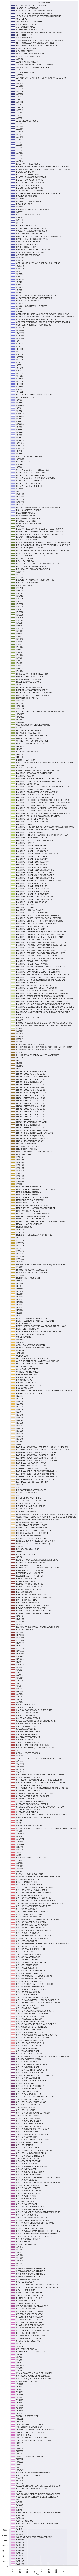

Year                                       2014    2015    2016    2017  \
FacilityName                                                              
2404 50 ST SE HOUSING                       NaN     NaN     NaN     NaN   
4 CORNERS OFFICE BUILDING                   NaN     NaN     NaN     NaN   
52 ST EAST AREA OFFICE                    437.0   414.0   402.0   292.0   
66 ST DEPOT                               116.0    90.0    86.0   102.0   
90 AV DEPOT                               526.0   488.0   426.0   424.0   
...                                         ...     ...     ...     ...   
WESTWINDS POLICE CAMPUS - EAST BUILDING  1380.0  1206.0  1984.0  1887.0   
WESTWINDS POLICE CAMPUS - WAREHOUSE         NaN     NaN  2824.0  3491.0   
WESTWINDS POLICE CAMPUS - WEST BUILDING  1051.0  1910.0  1982.0  3236.0   
WHITEHORN MULTI SERVICE CENTRE           4423.0  5291.0  3864.0  3838.0   
WILDFLOWER ARTS CENTRE                   1645.0   940.0   823.0   947.0   

Year                                       2018    2019    2020    2021  
FacilityName                                                             
2404 50 ST SE HOUSING                       NaN    17.0   445.0   230.0  
4 CORNERS OFFICE BUILDING                   NaN     NaN   247.0   435.0  
52 ST EAST AREA OFFICE                    262.0   314.0   311.0   175.0  
66 ST DEPOT                               102.0    18.0     NaN     NaN  
90 AV DEPOT                               418.0   459.0   437.0   226.0  
...                                         ...     ...     ...     ...  
WESTWINDS POLICE CAMPUS - EAST BUILDING  3267.0  1324.0  2475.0   884.0  
WESTWINDS POLICE CAMPUS - WAREHOUSE      3821.0  3803.0  4025.0  2347.0  
WESTWINDS POLICE CAMPUS - WEST BUILDING  1730.0  1630.0  1559.0  1161.0  
WHITEHORN MULTI SERVICE CENTRE           5462.0  4209.0  4001.0  2237.0  
WILDFLOWER ARTS CENTRE                   1098.0  1197.0  1019.0   539.0  

[451 rows x 8 columns]

<Figure size 259200x259200 with 0 Axes>

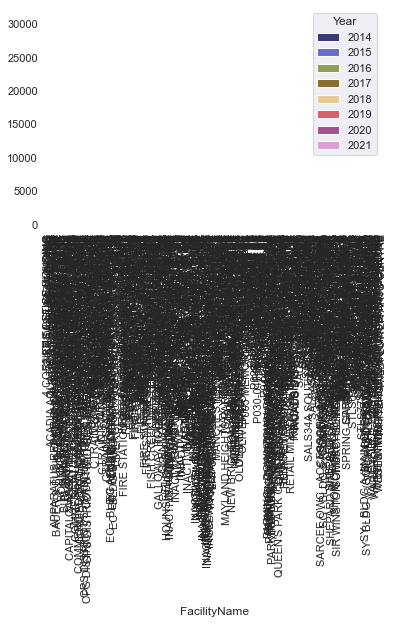

Year                                    2014    2015    2016    2017    2018  \
FacilityName                                                                   
BEARSPAW SALT SILO                    1500.0   969.0   886.0  1395.0  1451.0   
CORPORATE WAREHOUSE                      NaN     NaN   229.0   976.0   976.0   
CTRAIN STATION - 69TH STREET SW          NaN     NaN     NaN     NaN   844.0   
FIRE HEADQUARTERS                        NaN     NaN     NaN  1248.0  1123.0   
FIRE STATION 05 - SOUTH CALGARY          NaN  1794.0  5159.0  5302.0  5272.0   
FIRE STATION 07 - MOUNT PLEASANT         NaN     NaN     NaN  1649.0  2015.0   
FIRE STATION 08 - ROSSCARROCK            NaN   415.0  1166.0  1235.0  1236.0   
FIRE STATION 22 - TEMPLE               265.0     NaN  1226.0  1795.0  1824.0   
FIRE STATION 24 - CEDARBRAE              NaN   614.0   915.0  1711.0  1721.0   
FIRE STATION 30 - MCKENZIE TOWNE      1630.0  1740.0  1756.0  1617.0  1572.0   
FIRE STATION 42 - TUSCANY                NaN     NaN     NaN     NaN  1284.0   
GLENMORE WATER TREATMENT PLANT - WB      NaN     NaN     NaN     NaN   426.0   
MANCHESTER BUILDING M                    NaN     NaN     NaN  1042.0  2412.0   
SARCEE OWC - ADMINISTRATION BUILDING     NaN     NaN     NaN     NaN  1489.0   
SOUTHLAND LEISURE CENTRE                 NaN     NaN   704.0     NaN   244.0   

Year                                    2019    2020    2021  
FacilityName                                                  
BEARSPAW SALT SILO                    1139.0   578.0   642.0  
CORPORATE WAREHOUSE                    309.0   925.0     NaN  
CTRAIN STATION - 69TH STREET SW          NaN     NaN     NaN  
FIRE HEADQUARTERS                      778.0  1259.0   632.0  
FIRE STATION 05 - SOUTH CALGARY       4259.0  3379.0  2356.0  
FIRE STATION 07 - MOUNT PLEASANT      1209.0   804.0  1326.0  
FIRE STATION 08 - ROSSCARROCK         1183.0   887.0   696.0  
FIRE STATION 22 - TEMPLE              1753.0  1404.0  1003.0  
FIRE STATION 24 - CEDARBRAE           1439.0  1101.0   796.0  
FIRE STATION 30 - MCKENZIE TOWNE      1425.0   886.0   596.0  
FIRE STATION 42 - TUSCANY             1132.0  1590.0   808.0  
GLENMORE WATER TREATMENT PLANT - WB    718.0     NaN     NaN  
MANCHESTER BUILDING M                 2058.0  1147.0  1600.0  
SARCEE OWC - ADMINISTRATION BUILDING  1233.0  1361.0  1857.0  
SOUTHLAND LEISURE CENTRE               665.0     NaN     NaN

<Figure size 259200x259200 with 0 Axes>

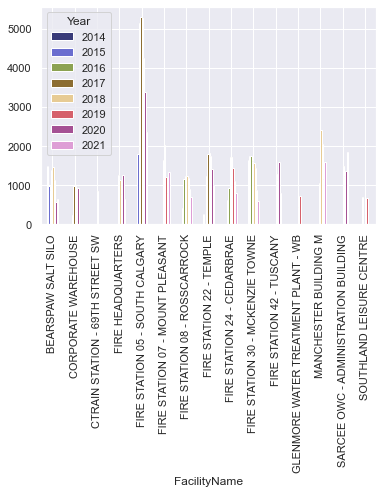

In [12]:
df = pd.DataFrame(rdata,columns=["Business Unit Desc","FacilityName","Site ID", "FacilityAddress","Energy Description",
                                 "Year","Month","Total Consumption","Unit"])
df1=pd.DataFrame.drop(rdata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df1 = df1.loc[df1['Energy Description'] == 'Electricity']
df1['Total Consumption'] = pd.to_numeric(df1['Total Consumption'], errors='coerce')
df1=df1.loc[df1['Total Consumption'] > 0]
df1=df1.loc[df1['Year'].between(2014,2021)]
df1.name = "Electricity Usage of each Year "
df1=df1.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=0)
display(df1)

fig = plt.figure()
df1.plot(kind='bar', colormap='tab20b', grid=True)
fig.set_size_inches(3600,3600)
plt.show()

df2=pd.DataFrame.drop(rdata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df2= df2.loc[df2['Energy Description'] == 'Natural Gas']
df2['Total Consumption'] = pd.to_numeric(df2['Total Consumption'], errors='coerce')
df2 =df2.loc[df2['Total Consumption'] > 0]
df2 =df2.loc[df2['Year'].between(2014,2021)]
df2.name = "Natual Gas Usage of each Year "
df2=df2.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=1)
display(df2)

fig = plt.figure()
df2.plot(kind='bar', colormap='tab20b', grid=True)
fig.set_size_inches(3600,3600)
plt.show()


df3=pd.DataFrame.drop(rdata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df3 = df3.loc[df3['Energy Description'] == 'Solar Power']
df3['Total Consumption'] = pd.to_numeric(df3['Total Consumption'], errors='coerce')
df3=df3.loc[df3['Total Consumption'] > 0]
df3=df3.loc[df3['Year'].between(2014,2021)]
df3.name = "Solar Power Usage of each Year "
df3=df3.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=1)

display(df3)

fig = plt.figure()
df3.plot(kind='bar', colormap='tab20b', grid=True)
fig.set_size_inches(3600,3600)
plt.show()




# Conclusion